# K-Nearest Neighbour Method with Library

#### - Danial Hawari [ lida1018 ] [ 67252 ]
#### - Kai Li Ong [ onka1012 ] [ 67254 ]

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import os

In [2]:
#main_project_path = r"C:\Users\danny\OneDrive - bwedu\EU4M MASTER SUBJECTS\SEMESTER 2\Kuenstliche Intelligenz\AI\ImageClassificationMethods"
main_project_path = r"C:\Users\KylieOng\Documents\GitHub\ImageClassificationMethods"
image_folder = os.path.join(main_project_path,"dataset")
feature_path = os.path.join(main_project_path,"feature","feature.csv")

df = pd.read_csv(feature_path)

In [3]:
df.head() # returns the first n rows of the csv data, 5 by default

,contour_points,amount_contours,rect_area,hull_area,approximation_area,contour_perimeters,corners,harris_corners,ratio_wide_length,contour_length_area_ratio,contour_length_rect_area_ratio,contour_length_hull_area_ratio,contour_rect_length_ratio,contour_hull_length_ratio,extent,solidity,hull_rectangle_ratio,labels
0,676,3,20729.54524,14977.0,10152.5,789.494509,53,901,3.399329,0.077310,0.038085,0.052714,1.149038,1.318301,0.492630,0.681845,0.722495,0
1,1725,3,65025.00000,65025.0,48154.5,1847.192994,92,1582,1.000000,0.038508,0.028407,0.028407,1.810974,1.810974,0.737693,0.737693,1.000000,0
2,514,2,18142.00000,14201.0,11280.5,561.220343,62,305,0.487047,0.049727,0.030935,0.039520,0.977736,1.134376,0.622092,0.794733,0.782769,0
3,492,83,6807.69467,4847.5,1323.5,598.867093,52,15,0.124905,0.447584,0.087969,0.123541,1.140181,1.214194,0.196542,0.276019,0.712062,0
4,988,5,54314.98572,33316.0,25395.5,1076.641697,54,1504,1.197183,0.042451,0.019822,0.032316,1.150258,1.313623,0.466943,0.761256,0.613385,0


In [4]:
df.shape # store the number of rows and columns

(800, 18)

## Data Visualisation

Histogram of the method (characteristics and Result/Class)

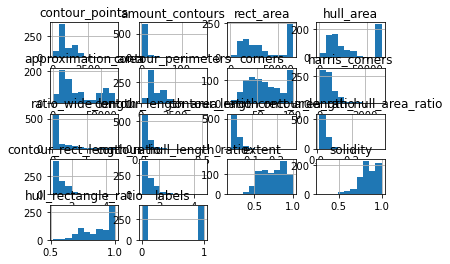

In [5]:
df.hist()
plt.show()

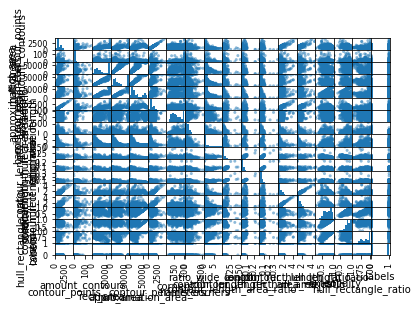

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('X: ', X.shape, 'y: ',y.shape)

X:  (800, 17) y:  (800,)


## Split into Training and test data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

print('X_train: ', X_train.shape, 'y_train: ',y_train.shape)
print('X_test: ', X_test.shape, 'y_test:', y_test.shape)

X_train:  (640, 17) y_train:  (640,)
X_test:  (160, 17) y_test: (160,)


In [9]:
X_train.head()

,contour_points,amount_contours,rect_area,hull_area,approximation_area,contour_perimeters,corners,harris_corners,ratio_wide_length,contour_length_area_ratio,contour_length_rect_area_ratio,contour_length_hull_area_ratio,contour_rect_length_ratio,contour_hull_length_ratio,extent,solidity,hull_rectangle_ratio
264,1580,2,65025.00000,65025.0,50169.5,1673.612260,74,897,1.000000,0.033369,0.025738,0.025738,1.640796,1.640796,0.771303,0.771303,1.000000
615,1478,3,65025.00000,64462.5,45746.5,1569.126978,78,251,1.000000,0.034397,0.024131,0.024342,1.538360,1.559016,0.701546,0.707667,0.991349
329,920,4,55845.00000,35559.0,23986.5,989.587874,78,355,1.164384,0.041296,0.017720,0.027829,1.043869,1.186499,0.429098,0.673894,0.636745
342,472,2,16821.00000,11920.0,9633.5,536.617312,73,149,0.470899,0.055689,0.031902,0.045018,0.965139,1.177629,0.572855,0.808389,0.708638
394,676,2,28754.64854,22359.5,17094.0,805.234624,56,159,3.182118,0.047035,0.028004,0.036013,1.012745,1.160856,0.595382,0.765670,0.777596


# Train and apply with different Machine Learning Model

### K-Nearest Neighbour (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62 18]
 [18 62]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        80
           1       0.78      0.78      0.78        80

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.78      0.78      0.78       160

